# F20DL Coursework Group 8 2023-24

### Group 8 Members:
- Madihah Anaum
- Tanisha Kasar
- Sneha Sunny
- Dhruv Raghu
- Moses Varghese

# Part 3. Supervised Learning: Generalisation & Overfitting; Decision Trees

In [54]:
# import basic libaries
import numpy as np
import pandas as pd

# import other libaries for the study
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import cv2

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
# read the coursework data set
X_train = pd.read_csv("/Users/dhruv/Documents/Y4S1/F20DL/Traffic_Sign/CompleteDataSet/x_train_all.csv")
y_train = pd.read_csv("/Users/dhruv/Documents/Y4S1/F20DL/Traffic_Sign/CompleteDataSet/y_train_all.csv")

X_test = pd.read_csv("/Users/dhruv/Documents/Y4S1/F20DL/Traffic_Sign/CompleteDataSet/x_test_all.csv")
y_test = pd.read_csv("/Users/dhruv/Documents/Y4S1/F20DL/Traffic_Sign/CompleteDataSet/y_test_all.csv")

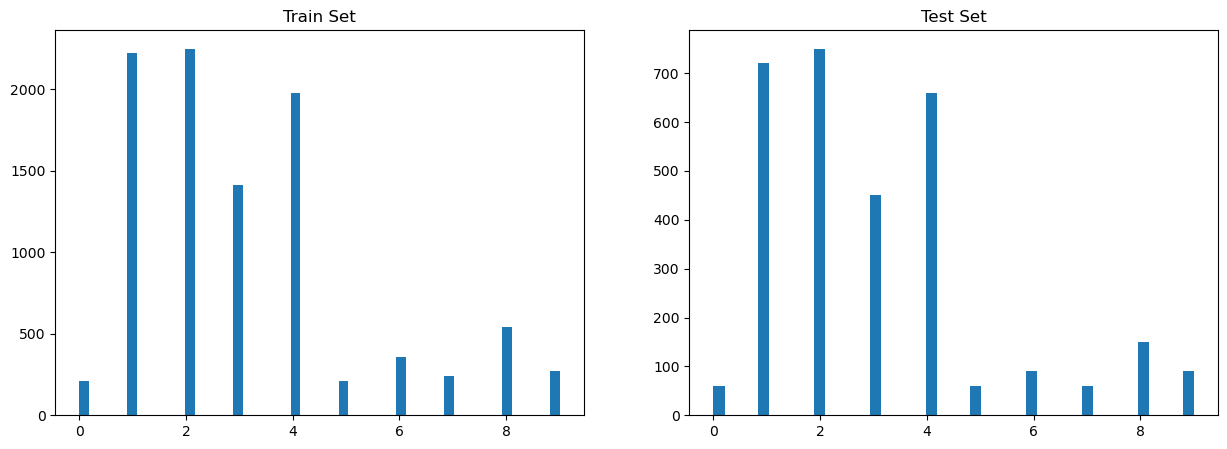

In [57]:
# class distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=50)
plt.title("Train Set")
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=43)
plt.title("Test Set")
plt.show() 

In [58]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9690, 2304)
(9690, 1)
(3090, 2304)
(3090, 1)


In [59]:
print(X_train.isnull().sum().sum())
print(y_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())
print(y_test.isnull().sum().sum())

0
0
0
0


## Decision Trees using only Train Dataset

In [60]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, train_size=0.3, stratify=y_train, random_state=42)

# Create Decision Tree classifer object
dt = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifer
dt.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred_dt = dt.predict(X_test1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9690, 2304)
(9690, 1)
(3090, 2304)
(3090, 1)


In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# create a custom function for getting metrics for each class
def class_metrics(y_test, y_pred, algorithm='<Alg Name>'):
    conf_matrix = confusion_matrix(y_test, y_pred)

    num_classes = len(conf_matrix)

    # create a table of comparison comapring the accuracy, precision, true positive rate, false positive rate and f1 score for each class and then the entire model
    metrics = pd.DataFrame(columns=['Precision', 'Recall', 'FP Rate', 'F1 Score'])

    tp_sum = 0
    fn_sum = 0
    fp_sum = 0
    tn_sum = 0

    for i in range(num_classes):
        # Calculate metrics for the current class
        tp = conf_matrix[i, i]
        fn = conf_matrix[i, :].sum() - tp
        fp = conf_matrix[:, i].sum() - tp
        tn = conf_matrix.sum() - (tp + fn + fp)

        tp_sum += tp
        fn_sum += fn
        fp_sum += fp
        tn_sum += tn

        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        fp_rate = fp/(fp+tn)
        f_measure = 2*precision*recall/(precision+recall)

        metrics.loc[i] = [precision, recall, fp_rate, f_measure]
        
    metrics.index = ['Class '+str(i) for i in range(num_classes)]

    return metrics

In [62]:
# function to get overall metrics
def overall_metrics(y_test, y_pred, algorithm='<Alg Name>'):
    conf_matrix = confusion_matrix(y_test, y_pred)

    num_classes = len(conf_matrix)
    
    tp_sum = 0
    fn_sum = 0
    fp_sum = 0
    tn_sum = 0

    metrics = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'FP Rate', 'F1 Score'])

    for i in range(num_classes):
        # Calculate metrics for the current class
        tp = conf_matrix[i, i]
        fn = conf_matrix[i, :].sum() - tp
        fp = conf_matrix[:, i].sum() - tp
        tn = conf_matrix.sum() - (tp + fn + fp)

        tp_sum += tp
        fn_sum += fn
        fp_sum += fp
        tn_sum += tn

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    fp_rate = fp_sum/(fp_sum+tn_sum)
    f_measure = f1_score(y_test, y_pred, average='macro')

    metrics.loc[0] = [accuracy, precision, recall, fp_rate, f_measure]
    metrics.index = [algorithm]

    return metrics

In [63]:
print('Class Metrics')
print(class_metrics(y_test1, y_pred_dt, 'Decision Tree'))
print('\nOverall Metrics')
print(overall_metrics(y_test1, y_pred_dt, 'Decision Tree'))

Class Metrics
         Precision    Recall   FP Rate  F1 Score
Class 0   0.496894  0.544218  0.012206  0.519481
Class 1   0.754021  0.723938  0.070186  0.738674
Class 2   0.753968  0.723810  0.071429  0.738581
Class 3   0.744186  0.778116  0.045549  0.760773
Class 4   0.751955  0.763348  0.064666  0.757608
Class 5   0.573864  0.687075  0.011302  0.625387
Class 6   0.573718  0.710317  0.020364  0.634752
Class 7   0.690647  0.571429  0.006500  0.625407
Class 8   0.672000  0.666667  0.019204  0.669323
Class 9   0.627119  0.587302  0.010009  0.606557

Overall Metrics
               Accuracy  Precision    Recall   FP Rate  F1 Score
Decision Tree  0.723868   0.663837  0.675622  0.030681  0.667654


## Decision Trees Using 10-Fold Cross-Validation

Cross-validation is a resampling technique used in machine learning to assess how well a model will generalize to an independent dataset. In 10-fold cross-validation, the dataset is divided into 10 equal-sized folds. The model is trained and evaluated 10 times, each time using a different fold as the test set and the remaining folds as the training set.

In [64]:
# retrain the model using 10 fold cross validation and then test the results
from sklearn.model_selection import cross_val_predict, cross_val_score

# using cross_val predict
y_pred_dt_cv = cross_val_predict(dt, X_train, y_train, cv=10)

print('Class Metrics for Cross Val Predict')
print(class_metrics(y_train, y_pred_dt_cv, 'Cross Val'))
print('\nOverall Metrics for Cross Val Predict')
print(overall_metrics(y_train, y_pred_dt_cv, 'Cross Val'))

Class Metrics for Cross Val Predict
         Precision    Recall   FP Rate  F1 Score
Class 0   0.386473  0.380952  0.013397  0.383693
Class 1   0.690603  0.701802  0.093440  0.696157
Class 2   0.669543  0.689778  0.102957  0.679510
Class 3   0.712627  0.696454  0.047826  0.704448
Class 4   0.714729  0.698485  0.071595  0.706513
Class 5   0.380567  0.447619  0.016139  0.411379
Class 6   0.539726  0.547222  0.018006  0.543448
Class 7   0.563380  0.500000  0.009841  0.529801
Class 8   0.639279  0.590741  0.019672  0.614052
Class 9   0.533088  0.537037  0.013482  0.535055

Overall Metrics for Cross Val Predict
           Accuracy  Precision    Recall   FP Rate  F1 Score
Cross Val  0.663571   0.583001  0.579009  0.037381  0.580406


In [65]:
# using cross val scores
scores = cross_val_score(dt, X_train, y_train, cv=10)
print('Cross Val Scores')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.55108359 0.6377709  0.68317853 0.67285862 0.66666667 0.71929825
 0.61506708 0.71104231 0.67285862 0.70588235]
Accuracy: 0.66 (+/- 0.10)


StratifiedKFold is a variation of k-fold cross-validation that ensures each fold's class distribution closely mirrors the overall class distribution of the entire dataset. This is particularly useful when dealing with imbalanced datasets, where some classes may have significantly fewer samples than others. The main idea is to preserve the percentage of samples for each class in every fold.

In [67]:
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold with 10 folds
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize an array to store accuracy scores for each fold
accuracy_scores = []

# Initialize arrays to store evaluation metrics for each fold
tp_rates, fp_rates, precision_list, recall_list, f1_list = [], [], [], [], []


# Perform 10-fold cross-validation
for train_index, test_index in skf.split(X_train, y_train):
    X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train the classifier on the current training fold
    dt.fit(X_fold_train, y_fold_train)

    # Make predictions on the current test fold
    y_fold_pred = dt.predict(X_fold_test)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_fold_test, y_fold_pred)
    
    # Calculate TP rate, FP rate, precision, recall, and F-measure
    tp = conf_matrix[1, 1]  # True Positives
    fn = conf_matrix[1, 0]  # False Negatives
    fp = conf_matrix[0, 1]  # False Positives
    tn = conf_matrix[0, 0]  # True Negatives

    tp_rate = tp / (tp + fn)
    fp_rate = fp / (fp + tn)
    precision = precision_score(y_fold_test, y_fold_pred, average='macro')
    recall = recall_score(y_fold_test, y_fold_pred, average='macro')
    f1 = f1_score(y_fold_test, y_fold_pred, average='macro')

    # Append metrics to the lists
    tp_rates.append(tp_rate)
    fp_rates.append(fp_rate)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    # Calculate accuracy for the current fold
    accuracy = accuracy_score(y_fold_test, y_fold_pred)
    accuracy_scores.append(accuracy)
    
    

# Calculate the average accuracy across all folds
average_accuracy = np.mean(accuracy_scores)

# Calculate the average metrics across all folds
average_tp_rate = np.mean(tp_rates)
average_fp_rate = np.mean(fp_rates)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)

print(f"Average Accuracy: {average_accuracy:.2f}")
print(f"Average TP rate: {average_tp_rate:.2f}")
print(f"Average FP rate: {average_fp_rate:.2f}")
print(f"Average Precision: {average_precision:.2f}")
print(f"Average Recall: {average_recall:.2f}")
print(f"Average F-measure: {average_f1:.2f}")

Average Accuracy: 0.83
Average TP rate: 0.98
Average FP rate: 0.17
Average Precision: 0.79
Average Recall: 0.79
Average F-measure: 0.79


Higher metrics are seen while using stratified k-fold cross-validation.

## Decision Trees Using Train and Test Data Sets

Repeat the experiment, this time using training and testing data sets instead of the cross
validation. That is, build the J48 classifier using the training data set, and test the classifier using the test
data set. Note the accuracy. Answer the question: Does the decision tree generalize well to new data?
How do you tell?


In [68]:
# Train Decision Tree Classifer
dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt_tt = dt.predict(X_test)

print('Class Metrics for Train Test Split')
print(class_metrics(y_test, y_pred_dt_tt, 'Decision Tree Train Test'))
print('\nOverall Metrics for Train Test Split')
print(overall_metrics(y_test, y_pred_dt_tt, 'Decision Tree Train Test'))

Class Metrics for Train Test Split
         Precision    Recall   FP Rate  F1 Score
Class 0   0.271429  0.316667  0.016832  0.292308
Class 1   0.721584  0.784722  0.091983  0.751830
Class 2   0.763411  0.740000  0.073504  0.751523
Class 3   0.673203  0.686667  0.056818  0.679868
Class 4   0.726027  0.722727  0.074074  0.724374
Class 5   0.432836  0.483333  0.012541  0.456693
Class 6   0.461538  0.400000  0.014000  0.428571
Class 7   0.272727  0.300000  0.015842  0.285714
Class 8   0.571429  0.426667  0.016327  0.488550
Class 9   0.647887  0.511111  0.008333  0.571429

Overall Metrics for Train Test Split
                          Accuracy  Precision    Recall   FP Rate  F1 Score
Decision Tree Train Test  0.685437   0.554207  0.537189  0.034951  0.543086


Accuracy reduces from 0.72 to 0.68 when using test data set. This shows that the decision tree does not generalize as well to new data.

## Preprocessing

In [73]:
# Resizing the images to 40x40 pixels
target_size = 40

X_reduced = np.apply_along_axis(
    func1d=lambda img: cv2.resize(img.reshape(48, 48), dsize=(target_size, target_size)),
    axis=1, arr=X_train.values).reshape(-1, target_size*target_size)
X_reduced.shape

(9690, 1600)

In [74]:
from skimage import exposure

# convert X_train_reduced to images
X_train_reduced = X_reduced.reshape(-1, target_size, target_size)

# Function to apply preprocessing
def preprocess_image(image):

    # Convert to 8-bit unsigned integer for adaptive thresholding
    img = np.uint8(image)

    # Contrast enhancement
    p2, p98 = np.percentile(img, (2, 98))
    img_contrast = exposure.rescale_intensity(img, in_range=(p2, p98))

    # Apply adaptive thresholding
    thresh_adaptive_inv = cv2.adaptiveThreshold(
        img_contrast, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 7, 5)
    
    # create a circle from the center of the image and darken the image around the cirle
    mask = np.zeros(img.shape, dtype=np.uint8)
    cv2.circle(mask, (20, 20), 12, (255, 255, 255), -1, 8, 0)
    masked_img = cv2.bitwise_and(thresh_adaptive_inv, mask)

    return masked_img

# Apply preprocessing to each image in the dataset
preprocessed_images = [preprocess_image(image) for image in X_train_reduced]

# Flatten augmented images
X_train_aug = np.array(preprocessed_images).reshape(-1, target_size * target_size)
X_train_aug.shape

(9690, 1600)

In [75]:
# Apply the resize to the test data

X_test_reduced = np.apply_along_axis(
    func1d=lambda img: cv2.resize(img.reshape(48, 48), dsize=(target_size, target_size)),
    axis=1, arr=X_test).reshape(-1, target_size*target_size)
X_test_reduced.shape

X_test_reduced = X_test_reduced.reshape(-1, target_size, target_size)
preprocessed_images = [preprocess_image(image) for image in X_test_reduced]
X_test_aug = np.array(preprocessed_images).reshape(-1, target_size * target_size)
X_test_aug.shape

(3090, 1600)

In [76]:
# function to plot images from the dataset
def plot_images(instances, images_per_row=10, size = 48, **options):
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = 'gist_gray', **options)
    plt.axis("off")

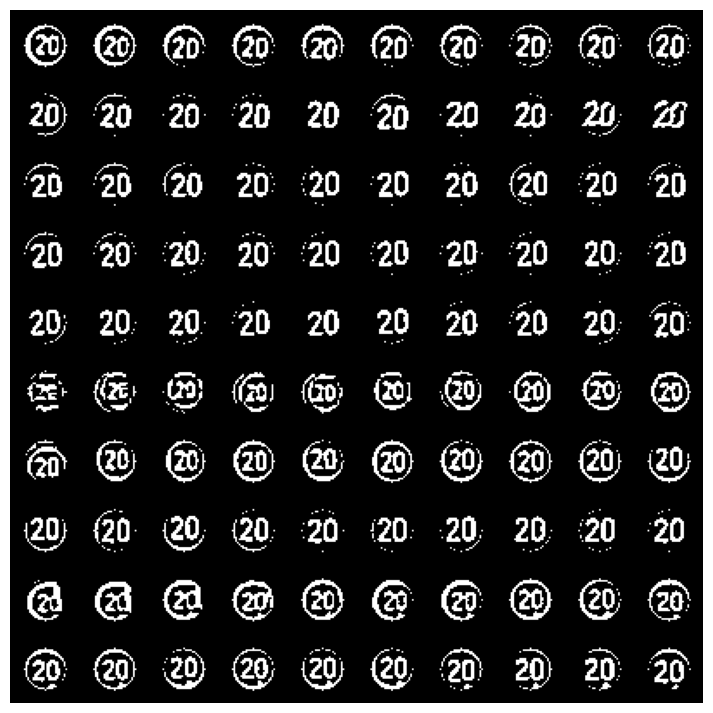

In [77]:
plt.figure(figsize=(9,9))
example_images = X_train_aug[100:200]
plot_images(example_images, images_per_row=10, size=target_size)
plt.show()

## Testing after preprocessing

#### Train-Test Split

In [78]:
dt.fit(X_train_aug,y_train)

#Predict the response for test dataset
y_pred_pp = dt.predict(X_test_aug)

In [79]:
print(y_test.shape)
print(y_pred_pp.shape)

(3090, 1)
(3090,)


In [81]:
print('Class Metrics after Preprocessing')
print(class_metrics(y_test, y_pred_pp, 'Decision Tree Preprocessed'))
print('\nOverall Metrics after Preprocessing')
print(overall_metrics(y_test, y_pred_pp, 'Decision Tree Preprocessed'))

Class Metrics after Preprocessing
         Precision    Recall   FP Rate  F1 Score
Class 0   0.655738  0.666667  0.006931  0.661157
Class 1   0.902367  0.847222  0.027848  0.873926
Class 2   0.871007  0.945333  0.044872  0.906650
Class 3   0.860190  0.806667  0.022348  0.832569
Class 4   0.902549  0.912121  0.026749  0.907310
Class 5   0.723684  0.916667  0.006931  0.808824
Class 6   0.790698  0.755556  0.006000  0.772727
Class 7   0.703704  0.633333  0.005281  0.666667
Class 8   0.763158  0.773333  0.012245  0.768212
Class 9   0.756098  0.688889  0.006667  0.720930

Overall Metrics after Preprocessing
                            Accuracy  Precision    Recall   FP Rate  F1 Score
Decision Tree Preprocessed  0.861812   0.792919  0.794579  0.015354  0.791897


Accuracy increases from 0.68 to 0.86 after preprocessing.

#### Cross Validation

In [82]:
# retrain the model using 10 fold cross validation and then test the results
from sklearn.model_selection import cross_val_predict, cross_val_score

# using cross_val predict
y_pred_dt_cv = cross_val_predict(dt, X_train_aug, y_train, cv=10)

print('Class Metrics - Preprocessed - CrossVal')
print(class_metrics(y_train, y_pred_dt_cv, 'Cross Val'))
print('\nOverall Metrics - Preprocessed - CrossVal')
print(overall_metrics(y_train, y_pred_dt_cv, 'Cross Val'))

Class Metrics - Preprocessed - CrossVal
         Precision    Recall   FP Rate  F1 Score
Class 0   0.616000  0.733333  0.010127  0.669565
Class 1   0.868102  0.871622  0.039357  0.869858
Class 2   0.864338  0.846667  0.040188  0.855411
Class 3   0.793343  0.811348  0.035990  0.802244
Class 4   0.912308  0.898485  0.022179  0.905344
Class 5   0.682540  0.614286  0.006329  0.646617
Class 6   0.770950  0.766667  0.008789  0.768802
Class 7   0.726190  0.762500  0.007302  0.743902
Class 8   0.831776  0.824074  0.009836  0.827907
Class 9   0.651246  0.677778  0.010403  0.664247

Overall Metrics - Preprocessed - CrossVal
           Accuracy  Precision    Recall   FP Rate  F1 Score
Cross Val  0.839319   0.771679  0.780676  0.017853   0.77539


In [83]:
# using cross val scores
scores = cross_val_score(dt, X_train_aug, y_train, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.86171311 0.82868937 0.81836945 0.83591331 0.84210526 0.85345717
 0.8121775  0.85242518 0.82146543 0.86687307]
Accuracy: 0.84 (+/- 0.04)


## Decision Tree Parameters and Their Influence

Experiment with various decision tree parameters that control the size of the tree. For example:
depth of the tree, confidence threshold for pruning, splitting criteria and the minimal number of instances
permissible per leaf. Make conclusions about their influence on the classifier's performance.

#### Max Depth Test

Overall Metrics for Max Depth 1
             Accuracy  Precision    Recall   FP Rate  F1 Score
Max Depth 1  0.365696    0.07322  0.153828  0.070478  0.099144


Overall Metrics for Max Depth 5
             Accuracy  Precision    Recall   FP Rate  F1 Score
Max Depth 5  0.737217   0.593154  0.539454  0.029198  0.537099


Overall Metrics for Max Depth 10
              Accuracy  Precision    Recall   FP Rate  F1 Score
Max Depth 10  0.862783   0.809333  0.774351  0.015246  0.788074


Overall Metrics for Max Depth 15
              Accuracy  Precision    Recall   FP Rate  F1 Score
Max Depth 15   0.86343    0.79421  0.793461  0.015174  0.792473


Overall Metrics for Max Depth 20
              Accuracy  Precision    Recall   FP Rate  F1 Score
Max Depth 20  0.861812   0.792919  0.794579  0.015354  0.791897


Overall Metrics for Max Depth 25
              Accuracy  Precision    Recall   FP Rate  F1 Score
Max Depth 25  0.861812   0.792919  0.794579  0.015354  0.791897


Overall Metrics for Max Dept

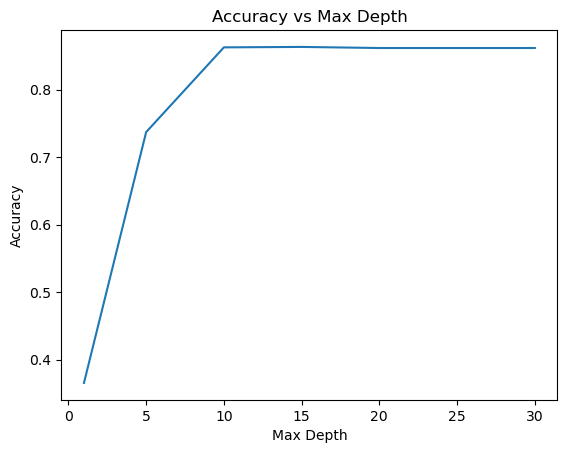

In [84]:
test_parameters = [1, 5, 10, 15, 20, 25, 30]
accuracies = []

for i in test_parameters:
    # Create Decision Tree classifer object
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)

    # Train Decision Tree Classifer
    dt.fit(X_train_aug,y_train)

    #Predict the response for test dataset
    y_pred = dt.predict(X_test_aug)

    accuracies.append([i, accuracy_score(y_test, y_pred)])

    print('Overall Metrics for Max Depth '+str(i))
    print(overall_metrics(y_test, y_pred, 'Max Depth '+str(i)))
    print('\n')

# plot accuracy vs max_depth
plt.plot(test_parameters, [x[1] for x in accuracies])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.show()

Highest accuracy is seen at max depth of 15.

#### Confidence Threshold Test

Overall Metrics for Min Samples Split 2
                     Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples Split 2  0.861812   0.792919  0.794579  0.015354  0.791897
Overall Metrics for Min Samples Split 4
                     Accuracy  Precision   Recall   FP Rate  F1 Score
Min Samples Split 4  0.866019    0.80479  0.78482  0.014887  0.792297
Overall Metrics for Min Samples Split 6
                     Accuracy  Precision    Recall  FP Rate  F1 Score
Min Samples Split 6  0.859871   0.788951  0.778089  0.01557  0.781302
Overall Metrics for Min Samples Split 8
                     Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples Split 8  0.865049   0.806914  0.790906  0.014995  0.796879
Overall Metrics for Min Samples Split 10
                      Accuracy  Precision    Recall  FP Rate  F1 Score
Min Samples Split 10  0.863107   0.796589  0.780823  0.01521  0.786668
Overall Metrics for Min Samples Split 12
                      Accuracy  Precision    Recall 

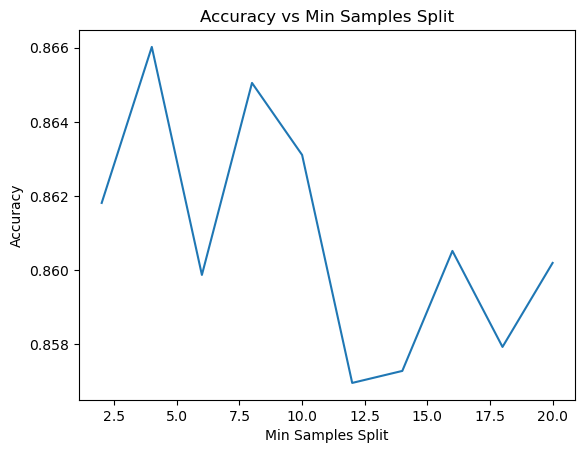

In [85]:
test_parameters = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
accuracies = []

for i in test_parameters:
    # Create Decision Tree classifer object
    dt = DecisionTreeClassifier(min_samples_split=i, random_state=42)

    # Train Decision Tree Classifer
    dt.fit(X_train_aug,y_train)

    #Predict the response for test dataset
    y_pred = dt.predict(X_test_aug)

    accuracies.append([i, accuracy_score(y_test, y_pred)])

    print('Overall Metrics for Min Samples Split '+str(i))
    print(overall_metrics(y_test, y_pred, 'Min Samples Split '+str(i)))

# plot accuracy vs min_samples_split
plt.plot(test_parameters, [x[1] for x in accuracies])
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Min Samples Split')
plt.show()

Highest Accuracy is seen at confidence threshold of 4

#### Splitting Criteria Test

In [86]:
# splitting criteria parameters to test
parameters = ['gini', 'entropy']

accuracies = []

for i in parameters:
    # Create Decision Tree classifer object
    dt = DecisionTreeClassifier(criterion=i, random_state=42)

    # Train Decision Tree Classifer
    dt.fit(X_train_aug,y_train)

    #Predict the response for test dataset
    y_pred = dt.predict(X_test_aug)

    accuracies.append([i, accuracy_score(y_test, y_pred)])

    print('Overall Metrics for Criterion '+str(i))
    print(overall_metrics(y_test, y_pred, 'Criterion '+str(i)))

Overall Metrics for Criterion gini
                Accuracy  Precision    Recall   FP Rate  F1 Score
Criterion gini  0.861812   0.792919  0.794579  0.015354  0.791897
Overall Metrics for Criterion entropy
                   Accuracy  Precision    Recall   FP Rate  F1 Score
Criterion entropy  0.860841   0.805681  0.805519  0.015462  0.799253


#### Minimim Number of Instances per Leaf Test

Overall Metrics for Min Samples per Leaf 2
                        Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples per Leaf 2  0.866019   0.806946  0.779121  0.014887  0.790202
Overall Metrics for Min Samples per Leaf 4
                        Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples per Leaf 4  0.850162   0.776502  0.746197  0.016649   0.75519
Overall Metrics for Min Samples per Leaf 6
                        Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples per Leaf 6  0.845631   0.763337  0.736855  0.017152  0.747205
Overall Metrics for Min Samples per Leaf 8
                        Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples per Leaf 8  0.847573   0.776271  0.727651  0.016936  0.747182
Overall Metrics for Min Samples per Leaf 10
                         Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples per Leaf 10  0.842395   0.767937  0.714424  0.017512  0.735318
Overall Metrics for Min Samples per Leaf 1

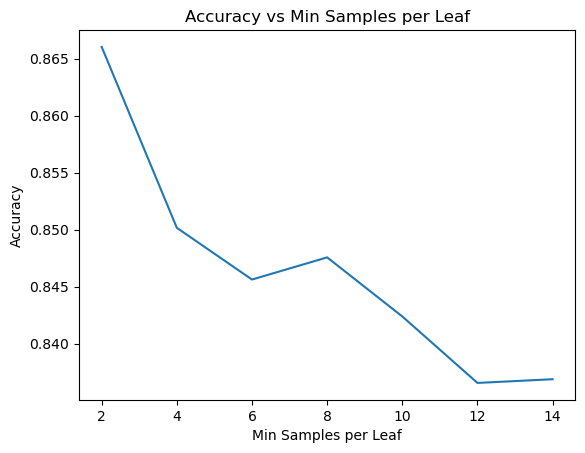

In [87]:
parameters = [2, 4, 6, 8, 10, 12, 14]
accuracies = []

for i in parameters:
    # Create Decision Tree classifer object
    dt = DecisionTreeClassifier(min_samples_leaf=i, random_state=42)

    # Train Decision Tree Classifer
    dt.fit(X_train_aug,y_train)

    #Predict the response for test dataset
    y_pred = dt.predict(X_test_aug)

    accuracies.append([i, accuracy_score(y_test, y_pred)])

    print('Overall Metrics for Min Samples per Leaf '+str(i))
    print(overall_metrics(y_test, y_pred, 'Min Samples per Leaf '+str(i)))

# plot accuracy vs min_impurity_decrease
plt.plot(parameters, [x[1] for x in accuracies])
plt.xlabel('Min Samples per Leaf')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Min Samples per Leaf')
plt.show()

Highest accuracy is seen at minimum number of instances per leaf of 2

In [88]:
dt = DecisionTreeClassifier(max_depth=15, min_samples_split=4, criterion='gini', min_samples_leaf=2, random_state=42)
dt.fit(X_train_aug,y_train)
y_pred_par = dt.predict(X_test_aug)

print('Class Metrics for Parameter Tuned Tree')
print(class_metrics(y_test, y_pred_par, 'Paramenter Tuned Tree'))
print('\nOverall Metrics for Parameter Tuned Tree')
print(overall_metrics(y_test, y_pred_par, 'Parameter Tuned Tree'))

Class Metrics for Parameter Tuned Tree
         Precision    Recall   FP Rate  F1 Score
Class 0   0.714286  0.750000  0.005941  0.731707
Class 1   0.886269  0.887500  0.034599  0.886884
Class 2   0.857660  0.948000  0.050427  0.900570
Class 3   0.847575  0.815556  0.025000  0.831257
Class 4   0.935636  0.903030  0.016872  0.919044
Class 5   0.750000  0.850000  0.005611  0.796875
Class 6   0.761905  0.711111  0.006667  0.735632
Class 7   0.750000  0.550000  0.003630  0.634615
Class 8   0.824818  0.753333  0.008163  0.787456
Class 9   0.797297  0.655556  0.005000  0.719512

Overall Metrics for Parameter Tuned Tree
                      Accuracy  Precision    Recall   FP Rate  F1 Score
Parameter Tuned Tree  0.866667   0.812545  0.782409  0.014815  0.794355


Accuracy increases from 0.861 to 0.866 after preprocessing.

## Test Set 30% Boost

Make new training and testing sets, by moving 30% of the instances from the original training
set into the testing set. Note the accuracies on the training and the testing sets

In [89]:
# remove 30% of instance from X_train and y_train
from sklearn.model_selection import train_test_split

print('X_train: ', X_train_aug.shape)
print('X_test:', X_test_aug.shape)

X_train_new, X_test_add, y_train_new, y_test_add = train_test_split(X_train_aug, y_train, test_size=0.3, random_state=42, stratify=y_train)

X_test_30 = X_test_aug
y_test_30 = y_test.values
# Add X_test_add and y_test_add to X_test and y_test
X_test_new = np.concatenate((X_test_30, X_test_add), axis=0)
y_test_new = np.concatenate((y_test_30, y_test_add), axis=0)

print('New X_train:', X_train_new.shape)
print('New X_test:', X_test_new.shape)


X_train:  (9690, 1600)
X_test: (3090, 1600)
New X_train: (6783, 1600)
New X_test: (5997, 1600)


In [90]:
dt.fit(X_train_new,y_train_new)
y_pred_30 = dt.predict(X_test_new)

print('Class Metrics for 30% Boost to test set')
print(class_metrics(y_test_new, y_pred_30, '30% Boost'))
print('\nOverall Metrics for 30% Boost to test set')
print(overall_metrics(y_test_new, y_pred_30, '30% Boost'))

Class Metrics for 30% Boost to test set
         Precision    Recall   FP Rate  F1 Score
Class 0   0.664179  0.723577  0.007661  0.692607
Class 1   0.849827  0.886003  0.047061  0.867538
Class 2   0.843303  0.910175  0.052712  0.875464
Class 3   0.831475  0.768614  0.026542  0.798810
Class 4   0.926789  0.888357  0.018554  0.907166
Class 5   0.747967  0.747967  0.005277  0.747967
Class 6   0.742424  0.742424  0.008795  0.742424
Class 7   0.775701  0.628788  0.004092  0.694561
Class 8   0.813115  0.794872  0.010026  0.803890
Class 9   0.760870  0.614035  0.005664  0.679612

Overall Metrics for 30% Boost to test set
           Accuracy  Precision    Recall   FP Rate  F1 Score
30% Boost   0.84609   0.795565  0.770481  0.017101  0.781004


Accuracy reduces from 0.86 to 0.84 after 30% reduction in training set.

## Test Set 60% Boost

Make new training and testing sets, by moving 60% of the instances from the original training
set into the testing set. Note the accuracies on the training and the testing sets

In [91]:
# remove 30% of instance from X_train and y_train
from sklearn.model_selection import train_test_split

print('X_train: ', X_train.shape)
print('X_test:', X_test.shape)

X_train_new, X_test_add, y_train_new, y_test_add = train_test_split(X_train_aug, y_train, test_size=0.6, random_state=42, stratify=y_train)

X_test_60 = X_test_aug
y_test_60 = y_test.values
# Add X_test_add and y_test_add to X_test and y_test
X_test_new = np.concatenate((X_test_60, X_test_add), axis=0)
y_test_new = np.concatenate((y_test_60, y_test_add), axis=0)

print('New X_train:', X_train_new.shape)
print('New X_test:', X_test_new.shape)

X_train:  (9690, 2304)
X_test: (3090, 2304)
New X_train: (3876, 1600)
New X_test: (8904, 1600)


In [92]:
dt.fit(X_train_new,y_train_new)
y_pred_60 = dt.predict(X_test_new)

print('Class Metrics for 60% Boost to test set')
print(class_metrics(y_test_new, y_pred_60, '60% Boost'))
print('\nOverall Metrics for 60% Boost to test set')
print(overall_metrics(y_test_new, y_pred_60, '60% Boost'))

Class Metrics for 60% Boost to test set
         Precision    Recall   FP Rate  F1 Score
Class 0   0.590164  0.774194  0.011471  0.669767
Class 1   0.822477  0.873782  0.056480  0.847353
Class 2   0.813380  0.880000  0.062316  0.845380
Class 3   0.826923  0.729938  0.026025  0.775410
Class 4   0.901074  0.862554  0.024802  0.881393
Class 5   0.675000  0.725806  0.007456  0.699482
Class 6   0.801980  0.794118  0.006978  0.798030
Class 7   0.727273  0.588235  0.005172  0.650407
Class 8   0.868852  0.782700  0.006643  0.823529
Class 9   0.790000  0.626984  0.004854  0.699115

Overall Metrics for 60% Boost to test set
           Accuracy  Precision    Recall   FP Rate  F1 Score
60% Boost  0.825696   0.781712  0.763831  0.019367  0.768987


Accuracy reduces from 0.86 to 0.82 after 60% reduction in training set.

## Test Set 90% Boost

Make new training and testing sets, by moving 60% of the instances from the original training
set into the testing set. Note the accuracies on the training and the testing sets

In [ ]:
# remove 30% of instance from X_train and y_train
from sklearn.model_selection import train_test_split

print('X_train: ', X_train.shape)
print('X_test:', X_test.shape)

X_train_new, X_test_add, y_train_new, y_test_add = train_test_split(X_train_aug, y_train, test_size=0.9, random_state=42, stratify=y_train)

X_test_90 = X_test_aug
y_test_90 = y_test.values
# Add X_test_add and y_test_add to X_test and y_test
X_test_new = np.concatenate((X_test_90, X_test_add), axis=0)
y_test_new = np.concatenate((y_test_90, y_test_add), axis=0)

print('New X_train:', X_train_new.shape)
print('New X_test:', X_test_new.shape)

X_train:  (9690, 2304)
X_test: (3090, 2304)
New X_train: (969, 1600)
New X_test: (11811, 1600)


In [ ]:
dt.fit(X_train_new,y_train_new)
y_pred_60 = dt.predict(X_test_new)

print('Class Metrics for 90% Boost to test set')
print(class_metrics(y_test_new, y_pred_60, '60% Boost'))
print('\nOverall Metrics for 90% Boost to test set')
print(overall_metrics(y_test_new, y_pred_60, '60% Boost'))

Class Metrics for 90% Boost to test set
         Precision    Recall   FP Rate  F1 Score
Class 0   0.559028  0.646586  0.010984  0.599628
Class 1   0.845687  0.768212  0.041900  0.805090
Class 2   0.808411  0.748108  0.054449  0.777092
Class 3   0.658242  0.696917  0.061633  0.677027
Class 4   0.824663  0.876331  0.048564  0.849712
Class 5   0.438692  0.646586  0.017817  0.522727
Class 6   0.600000  0.536232  0.012986  0.566327
Class 7   0.455331  0.572464  0.016385  0.507223
Class 8   0.673344  0.687107  0.018971  0.680156
Class 9   0.411243  0.417417  0.017338  0.414307

Overall Metrics for 90% Boost to test set
           Accuracy  Precision    Recall   FP Rate  F1 Score
60% Boost  0.743375   0.627464  0.659596  0.028514  0.639929


Accuracy reduces from 0.86 to 0.74 after 90% reduction in training set.

## Additional Tree Classifier Studies

For higher marks, try some other decision tree algorithms (e.g. random forests). Repeat all of the
above experiments and make conclusions.

Decision Tree

In [93]:
# Fit the classifier to the training data
dt.fit(X_train_aug, y_train)
# Make predictions on the test data
y_pred_dt = dt.predict(X_test_aug)
overall_metrics(y_test, y_pred_dt, 'Decision Tree')

,Accuracy,Precision,Recall,FP Rate,F1 Score
Decision Tree,0.866667,0.812545,0.782409,0.014815,0.794355


Extra Tree

In [94]:
from sklearn.tree import ExtraTreeClassifier
# Create an ExtraTreeClassifier instance
extra_tree_classifier = ExtraTreeClassifier()
# Fit the classifier to the training data
extra_tree_classifier.fit(X_train_aug, y_train)
# Make predictions on the test data
y_pred_extra_tree = extra_tree_classifier.predict(X_test_aug)
overall_metrics(y_test, y_pred_extra_tree, 'Extra Tree')

,Accuracy,Precision,Recall,FP Rate,F1 Score
Extra Tree,0.767314,0.652342,0.646385,0.025854,0.647328


Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
# Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier()
# Fit the classifier to the training data
rf_classifier.fit(X_train_aug, y_train)
# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test_aug)
overall_metrics(y_test, y_pred_rf, 'Random Forest')

,Accuracy,Precision,Recall,FP Rate,F1 Score
Random Forest,0.951456,0.968761,0.924469,0.005394,0.943984


Ada Boost

In [96]:
from sklearn.ensemble import AdaBoostClassifier
# Create an AdaBoostClassifier instance
adaboost_classifier = AdaBoostClassifier()
# Fit the classifier to the training data
adaboost_classifier.fit(X_train_aug, y_train)
# Make predictions on the test data
y_pred_adaboost = adaboost_classifier.predict(X_test_aug)
overall_metrics(y_test, y_pred_adaboost, 'AdaBoost')

,Accuracy,Precision,Recall,FP Rate,F1 Score
AdaBoost,0.516181,0.60787,0.562991,0.053758,0.541713


Bagging Classifier

In [97]:
from sklearn.ensemble import BaggingClassifier
# Create a BaggingClassifier instance with DecisionTreeClassifier as base estimator
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier())
# Fit the classifier to the training data
bagging_classifier.fit(X_train_aug, y_train)
# Make predictions on the test data
y_pred_bagging = bagging_classifier.predict(X_test_aug)
overall_metrics(y_test, y_pred_bagging, 'Bagging')

,Accuracy,Precision,Recall,FP Rate,F1 Score
Bagging,0.911974,0.887909,0.846723,0.009781,0.860839


In [98]:
# table of comparison
metrics = [overall_metrics(y_test, y_pred_dt, 'Decision Tree'), overall_metrics(y_test, y_pred_extra_tree, 'Extra Tree'), overall_metrics(y_test, y_pred_rf, 'Random Forest'), overall_metrics(y_test, y_pred_adaboost, 'AdaBoost'), overall_metrics(y_test, y_pred_bagging, 'Bagging')]
metrics = pd.concat(metrics)
metrics

,Accuracy,Precision,Recall,FP Rate,F1 Score
Decision Tree,0.866667,0.812545,0.782409,0.014815,0.794355
Extra Tree,0.767314,0.652342,0.646385,0.025854,0.647328
Random Forest,0.951456,0.968761,0.924469,0.005394,0.943984
AdaBoost,0.516181,0.607870,0.562991,0.053758,0.541713
Bagging,0.911974,0.887909,0.846723,0.009781,0.860839


Gradient Boosting (takes too long to run)

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# # Create a GradientBoostingClassifier instance
# gb_classifier = GradientBoostingClassifier()
# # Fit the classifier to the training data
# gb_classifier.fit(X_train, y_train)
# # Make predictions on the test data
# y_pred_gb = gb_classifier.predict(X_test)

Hist Gradient Boosting (also takes too long to run)

In [ ]:
# from sklearn.experimental import enable_hist_gradient_boosting
# from sklearn.ensemble import HistGradientBoostingClassifier
# # Create a HistGradientBoostingClassifier instance
# hist_gb_classifier = HistGradientBoostingClassifier()
# # Fit the classifier to the training data
# hist_gb_classifier.fit(X_train, y_train)
# # Make predictions on the test data
# y_pred_hist_gb = hist_gb_classifier.predict(X_test)